# ELE 435/535 Computational HW5: Student Copy

In [255]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import matplotlib.patches as mpatches

## 1) Expectation  Maximization for a Scalar GMM
Objective: Fit a three component scalar GMM to training data. 

In [256]:
"""
These functions are provided to you.
"""
def generateScalarGMM(p, mu, sig, nx, nc):
    # seed
    rnd.seed(220606)
    np.random.seed(220606)

    # samples
    sx = np.zeros(nx)
    sy = np.zeros(nx, dtype=int)
    for j in range(0,nx):
        sample = np.random.multinomial(1, p)
        i = np.argwhere(sample==1).ravel()
        sx[j] = rnd.gauss(mu[i],sig[i])
        sy[j] = i
    return sx, sy 

def generate2DGMM(p, mu, sig, nx, nc):
    # seed
    rnd.seed(220606)
    np.random.seed(220606)

    nf = mu.shape[1]
    # samples
    sx = np.zeros((nx, nf))
    sy = np.zeros(nx, dtype=int)
    for j in range(0,nx):
        sample = np.random.multinomial(1, p)
        i = np.argwhere(sample==1).ravel()
        sx[j] = np.random.normal(mu[i],sig[i])
        sy[j] = i
    return sx, sy 

def gaussfunc(mu,sig,x):
   return (1/np.sqrt(2*np.pi)) * (1/sig) * np.exp(-(1.0/(2*sig**2))*(x-mu)**2)

def bgaussfunc(mu,sigma,x,y):
   return (1/(2*np.pi)) * (1/(sigma[0]*sigma[1])) * np.exp(-(1.0/2)*(((x-mu[0])/sigma[0])**2 +((y-mu[1])/sigma[1])**2))

**1-a) Compute the marginal density $f_{X}(x)$ of a scalar GMM given its parameters**   
Given the parameters of a GMM, write a function to compute the marginal density $f_{X}(x)$ for a given set of values of $x$.
This is in preparation to plot the density.

In [257]:
def generateDistribution(x, p , mu, sigma , nc=3):
    """
    TODO: Given the mixture parameters, find the density at a set of points x
    Inputs: 
    x: Set of points
    p: Weights of the mixture
    mu: Means of the mixture
    sigma: Standard deviations of the mixture
    
    Outputs:
    f: Probabilitiy density at each point in x
    
    Hint: Use the gaussfunc provided to you
    """

    marg_density = np.zeros(x.size)

    for j in range(x.size):
      for i in range(nc):
        marg_density[j] += p[i] * gaussfunc(mu[i], sigma[i], x[j])
    
    return marg_density

**1-b Plot a scalar GMM marginal density**  
For the parameter values:  
p = [0.25, 0.5, 0.25]  
mu = [-2.5, -1.0, 2.0]  
sigma = [0.25, 0.25, 0.5]  
Plot the GMM marginal density $f_X (x)$ at 200 equally spaced points in [-5, 5].

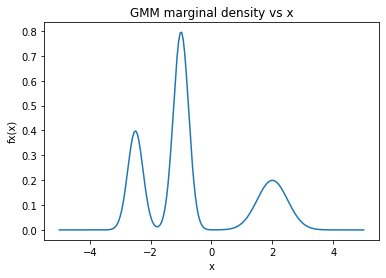

In [258]:
# <your code here>
nc = 3
p = np.array([0.25, 0.5, 0.25])
mu = np.array([-2.5, -1.0, 2.0])
sigma = np.array([0.25, 0.25, 0.5])
x = np.linspace(-5, 5, 200)

fx = generateDistribution(x, p, mu, sigma)

plt.title("GMM marginal density vs x") 
plt.xlabel("x") 
plt.ylabel("fx(x)") 

plt.plot(x, fx)
plt.show()

**1-c) Complete Maximum Likelihood**  
As a warm-up exercise, assume that the latent labels are known for each datapoint. Complete the function provided below to estimate the parameters of the GMM using maximum likelihood. (Write the function without using scikit-learn)

In [259]:
def fitGMMcomplete(sx, sy, nc):
    """
    TODO: Assuming that the latent labels are provided to you, 
    use maximum likelihood to estimate the mean and variance of the nc Gaussians.
    Inputs:
    sx - Scalar datapoints
    sy - Labels
    nc - Number of clusters
    
    Outputs:
    p_ml - Weights of the mixture
    mu_ml - Means of the mixture
    sig_ml - Standard deviations of the mixture
    """
    p_ml = np.zeros(nc)
    mu_ml = np.zeros(nc)
    sig_ml = np.zeros(nc)

    for i in range(nc):
      indices = np.where(sy == i)[0]
      x_indices = [sx[i] for i in indices]

      m_i = np.count_nonzero(sy == i)

      p_ml[i] = m_i / sy.size
      mu_ml[i] = (1 / m_i) * np.sum(x_indices)
      sig_ml[i] = np.sqrt((1 / m_i) * np.sum(np.square(x_indices - mu_ml[i])))

    return p_ml, mu_ml, sig_ml

**1-d) Generate training data**  
Generate nx = 100 training examples $\{(x_j,y_j)\}_{j=1}^{100}$ from a scalar GMM with the parameters in 1-b)   

In [260]:
#<your code here>
sx, sy = generateScalarGMM(p, mu, sigma, 100, 3)

**1-e) Use the training data to find the complete maximum likelihood parameter estimates of the GMM**  
Use your code to find the complete maximum likelihood estimates from the training data. Print the estimates of $p$, $\mu$, and $\sigma$ (3-vectors).

In [261]:
"""
This code is provided to you.
"""
p_ml, mu_ml, sigma_ml = fitGMMcomplete(sx, sy, nc)
print('CML estimate of p:',p_ml)
print('CML estimate of mu:',mu_ml)
print('CML estimate of sigma:',sigma_ml)

CML estimate of p: [0.2  0.61 0.19]
CML estimate of mu: [-2.57801287 -0.97642482  1.89029439]
CML estimate of sigma: [0.18092005 0.2586488  0.33959895]


**1-f) Plot the training data, true marginal density, and estimated marginal density**  
On one figure: plot the training data as points on the x-axis, the true marginal density $f_X(x)$, and the estimated marginal density $\hat f_X(x)$. Use a legend and label all axes.

(100,)


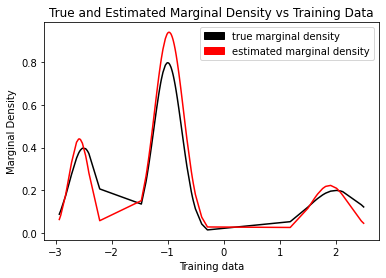

In [262]:
#Plot the points, the true distribution and maximum likelihood estimate of the distribution. 
#Clearly label the axes and the plots with legend.
#<you code here>

plt.title("True and Estimated Marginal Density vs Training Data") 
plt.xlabel("Training data") 
plt.ylabel("Marginal Density") 

sorted = np.sort(sx)

fx_true = generateDistribution(sorted, p, mu, sigma)
print(fx_true.shape)
fx_estimated = generateDistribution(sorted, p_ml, mu_ml, sigma_ml)

plt.plot(sorted, fx_true, color = "black")
plt.plot(sorted, fx_estimated, color = "red")

pop_a = mpatches.Patch(color='black', label='true marginal density')
pop_b = mpatches.Patch(color='red', label='estimated marginal density')
plt.legend(handles=[pop_a,pop_b])

plt.show()

**1-g) EM Algorithm**  
Now, we are going to code the EM algorithm assuming that the latent variables sy are unknown. We are going to first run k-means and use the results to initialize the EM algorithm. We will use the k-means algorithm in scikit-learn.

In [263]:
"""
This code is provided to you.
"""

from sklearn.cluster import KMeans

sxm = sx[:, np.newaxis]
print(sxm.shape)
kmeans = KMeans(n_clusters=3, random_state=0).fit(sxm)
print('k-means labels\n', kmeans.labels_)
print('k-means cluster centers\n', kmeans.cluster_centers_)

(100, 1)
k-means labels
 [1 0 2 1 2 0 2 0 0 0 2 0 2 2 0 0 0 2 0 0 0 2 1 2 0 1 0 0 0 1 0 0 0 0 2 0 0
 2 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 1 0 0 1 1 2 1 0 2
 0 1 0 0 2 0 0 0 0 0 1 0 2 0 0 1 0 1 1 1 2 2 2 0 0 1]
k-means cluster centers
 [[-0.97642482]
 [ 1.89029439]
 [-2.57801287]]


**1-f) Code the EM algorithm**  

In [264]:
def Estep(sx, p_em, mu_em, sig_em):
    """
    TODO: This code is for the E step in the EM algorithm.
    Inputs:
    sx: Datapoints
    p_em: Current estimate of the mixture weights
    mu_em: Estimates of the mixture means
    sig_em: Estimates of the mixture standard deviations
    
    Outputs:
    R: Posterior weights
    mll_em: Likelihood estimate
    """

    R = np.zeros((nc, sx.size))

    fx = generateDistribution(sx, p_em, mu_em, sig_em)
    mll_em = np.sum(np.log(fx))
    for i in range(nc):
      for j in range(sx.size):
        R[i][j] += (p_em[i] * gaussfunc(mu_em[i], sig_em[i], sx[j]) / fx[j])

    return R, mll_em

def Mstep(sx, R):
    """
    TODO: This code is for the M step in the EM algorithm.
    Inputs:
    sx: Datapoints
    R: Posterior weights
    
    Outputs:
    p_em: New estimate of the mixture weights
    mu_em: New estimate of the mixture means
    sig_em: New estimate of the mixture standard deviations
    """
    
    p_em = []
    mu_em = []
    sig_em = []

    for i in range(nc):
      p = 0
      mu = 0 
      sig = 0
      for j in range(sx.size):
        p += R[i][j]
        mu += R[i][j] * sx[j] / (np.sum(R[i]))
      
      p_em.append(p / sx.size)
      mu_em.append(mu)
      
      for j in range(sx.size):
        sig += R[i][j] * np.square((sx[j] - mu_em[i])) / (np.sum(R[i]))
      
      sig_em.append(np.sqrt(sig))
    
    return p_em, mu_em, sig_em 

**1-g) Code the iterative component of EM**

In [265]:
"""
TODO: Initialize EM with the K-Means algorithm and run until convergence
"""
p_em = np.array([0, 0, 0], dtype = float)
sig_em = np.array([0, 0, 0], dtype = float)
c0 = 0
c1 = 0
c2 = 0
label0 = []
label1 = []
label2 = []
ctr = 0

for label in kmeans.labels_:
  if (label == 0):
    c0 += 1
    label0.append(sx[ctr])
  elif (label == 1):
    c1 += 1
    label1.append(sx[ctr])
  else:
    c2 += 1
    label2.append(sx[ctr])
  ctr += 1

p_em[0] = c0 / sx.size
p_em[1] = c1 / sx.size
p_em[2] = c2 / sx.size

sig_em[0] = np.std(np.array(label0))
sig_em[1] = np.std(np.array(label1))
sig_em[2] = np.std(np.array(label2))

# print(p_em)
# print(sig_em)

mu_em = np.array([kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[2][0]])
print(mu_em)


R, mll_em = Estep(sx, p_em, mu_em, sig_em)
p_em, mu_em, sig_em = Mstep(sx, R)
R2, mll_em2 = Estep(sx, p_em, mu_em, sig_em)

# print(p_em)
# print(mu_em)
# print(sig_em)

while (mll_em2 > mll_em):
  mll_em = mll_em2
  p_em, mu_em, sig_em = Mstep(sx, R2)
  R2, mll_em2 = Estep(sx, p_em, mu_em, sig_em)

# print(p_em)
# print(mu_em)
# print(sig_em)

[-0.97642482  1.89029439 -2.57801287]


**1-h) Plot the estimated marginal density and the true marginal density**

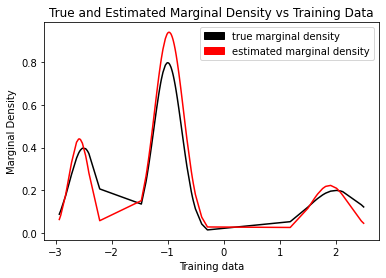

In [266]:
"""
Generate and plot the estimated density from the EM, and the true density
"""
plt.title("True and Estimated Marginal Density vs Training Data") 
plt.xlabel("Training data") 
plt.ylabel("Marginal Density") 

fx_estimated2 = generateDistribution(sorted, p_em, mu_em, sig_em)

plt.plot(sorted, fx_true, color = "black")
plt.plot(sorted, fx_estimated2, color = "red")

pop_a = mpatches.Patch(color='black', label='true marginal density')
pop_b = mpatches.Patch(color='red', label='estimated marginal density')
plt.legend(handles=[pop_a,pop_b])

plt.show()

## Exercise 2 - BiVariate GMM

We are going to repeat the same exercise with a 2D Gaussian mixture

**2-a) Generate samples from a GMM**  
Generate 800 samples from a 2D GMM with diagonal class covariances.  
Parameters:  
p = [0.33, 0.33, 0.33]  
mu = [[0 ,0], [-3, -3], [3,3]]   
Sigma = [[1.1,0.9], [1.1,1.1], [0.7,1.1]] (three diagonal 2 x 2 matrices) 

In [267]:
## Generate the samples using generate 2D GMM. 
## We generate non-isotropic axis-aligned densities
p = np.array([0.33, 0.33, 0.33])
mu = np.array([[0, 0], [-3, -3], [3, 3]])
sigma = np.array([[1.1, 0.9], [1.1, 1.1], [0.7, 1.1]])

sxb, syb = generate2DGMM(p, mu, sigma, 800, 3)

**2-b) Plot the samples**  
Plot the x samples as points on the 2D plane in the box [-7,7]x[-7,7].
Using an alpha parameter (tranparency) in the plot will aid visualization of the points.

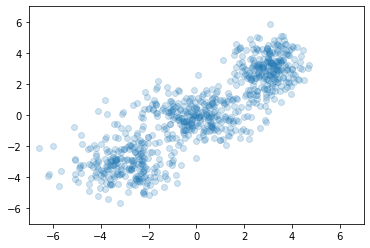

In [268]:
#<your code here>
plt.scatter(sxb.T[0], sxb.T[1], alpha=0.2)
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()

**2-c) Code the EM algorthm**  
We are going to code the EM algorithm to estimate the mixture parameters for the 2D data.

In [269]:
"""
This code is provided to you.
"""

from sklearn.cluster import KMeans
"""
We want to initialize the EM algorithm with KMeans. 
"""
kmeans = KMeans(n_clusters=3, random_state=0).fit(sxb)
print(kmeans.labels_)
print(kmeans.labels_.shape)
print(kmeans.cluster_centers_)

[1 0 1 1 0 2 0 2 0 1 2 2 2 1 2 0 2 2 1 1 1 0 2 1 0 2 1 0 2 0 0 0 2 2 1 2 0
 0 2 2 1 0 2 1 1 1 0 1 0 1 2 2 0 2 1 2 0 2 0 1 2 0 1 0 2 2 0 0 2 2 1 2 0 2
 0 1 2 1 2 0 0 0 1 1 2 2 0 1 0 0 1 2 2 0 2 2 1 2 1 0 1 1 2 2 0 0 1 1 2 1 1
 0 0 0 1 0 1 2 0 0 1 1 1 0 2 1 1 1 0 2 0 2 2 0 1 0 0 1 0 1 0 0 2 1 0 2 0 1
 1 1 1 0 2 1 0 0 2 2 0 1 0 2 1 1 2 2 0 1 2 2 2 2 1 2 2 0 0 0 1 2 0 1 2 2 0
 1 0 2 1 2 0 1 1 2 0 0 1 2 2 2 1 1 0 1 1 1 0 2 1 0 0 2 2 1 1 1 1 0 1 1 0 1
 0 1 2 0 1 0 2 0 1 1 2 0 2 2 1 0 1 1 0 0 0 0 0 2 0 1 0 2 0 2 2 1 1 0 2 0 1
 1 1 2 2 1 2 0 0 1 2 0 0 2 0 2 2 1 1 0 2 2 2 1 1 0 0 0 1 2 0 1 1 0 2 2 1 1
 0 0 2 0 2 0 1 2 1 1 0 2 0 0 2 0 1 1 0 1 2 0 1 2 2 0 1 0 0 1 0 0 2 0 2 2 0
 1 1 1 0 0 1 0 1 2 1 2 2 0 0 1 2 0 0 0 0 2 2 1 0 0 2 0 0 2 2 0 2 0 0 2 1 1
 1 2 0 2 1 2 2 1 0 0 2 1 2 0 1 0 2 1 2 2 0 1 1 1 0 0 0 1 1 0 2 2 2 1 0 2 0
 1 2 0 2 0 0 2 0 0 1 2 1 0 1 1 0 2 2 1 0 0 2 0 2 1 2 1 2 0 2 1 0 0 0 0 2 2
 2 2 1 1 0 0 0 2 2 2 2 2 1 0 2 0 2 1 1 2 2 1 1 1 1 2 2 2 2 0 2 2 0 1 0 0 0
 2 1 2 0 2 1 1 1 2 0 2 0 

**2-d) Code functions for the E and M steps of the EM algorithm**

In [270]:
def generateDistribution2D(x, y, p , mu, sigma , nc=3):
    marg_density = np.zeros((x.size, 2))
    for j in range(x.size):
      for i in range(nc):
        marg_density[j] += p[i] * bgaussfunc(mu[i], sigma[i], x[j], y[j])
    
    return marg_density

def Estep(sxb, p_em, mu_em, sig_em):
    """
    TODO: This code is for the E step in the EM algorithm.
    Inputs:
    sx: Datapoints
    p_em: Current estimate of the mixture weights
    mu_em: Estimates of the mixture means
    sig_em: Estimates of the mixture standard deviations
    
    Outputs:
    R: Posterior weights
    mll_em: Likelihood estimate
    """
    
    R = np.zeros((nc, 800, 2))

    fx = generateDistribution2D(sxb.T[0], sxb.T[1], p_em, mu_em, sig_em)
    mll_em = np.sum(np.log(fx), axis = 0)
    for i in range(nc):
      for j in range(800):
        R[i][j] = (p_em[i] * bgaussfunc(mu_em[i], sig_em[i], sxb.T[0][j], sxb.T[1][j]) / fx[j])

    return R, mll_em

def Mstep(sxb, R):
    """
    TODO: This code is for the M step in the EM algorithm.
    Inputs:
    sx: Datapoints
    R: Posterior weights
    
    Outputs:
    p_em: Current estimate of the mixture weights
    mu_em: Estimates of the mixture means
    sig_em: Estimates of the mixture standard deviations
    """

    p_em = []
    mu_em = []
    sig_em = []

    for i in range(nc):
      p = 0
      mu = 0 
      sig = 0
      for j in range(800):
        p += R[i][j]
        mu += R[i][j] * sxb[j] / (np.sum(R[i], axis = 0))
      
      p_em.append(p[0] / 800)
      mu_em.append(mu)
      
      for j in range(800):
        sig += R[i][j] * ((sxb[j] - mu_em[i]) * (sxb[j] - mu_em[i]).T) / (np.sum(R[i], axis = 0))
      
      sig_em.append(np.sqrt(sig))
    
    return p_em, mu_em, sig_em 

**2-e) Code the iterative component of EM**

In [271]:
"""
TODO: Initialize EM with the K-Means algorithm and run until convergence
"""
p_em = np.array([0, 0, 0], dtype = float)
sig_em = np.array([[0.0, 0.0], [0,0, 0,0], [0.0, 0.0]])
c0 = 0
c1 = 0
c2 = 0
label0 = []
label1 = []
label2 = []
ctr = 0

for label in kmeans.labels_:
  if (label == 0):
    c0 += 1
    label0.append(sxb[ctr])
  elif (label == 1):
    c1 += 1
    label1.append(sxb[ctr])
  else:
    c2 += 1
    label2.append(sxb[ctr])
  ctr += 1

p_em[0] = c0 / ctr
p_em[1] = c1 / ctr
p_em[2] = c2 / ctr

label0 = np.array(label0)
label1 = np.array(label1)
label2 = np.array(label2)

sig_em[0] = np.std(label0, axis = 0)
sig_em[1] = np.std(label1, axis = 0)
sig_em[2] = np.std(label2, axis = 0)

sig_em = np.array([sig_em[0], sig_em[1], sig_em[2]])
mu_em = np.array([kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], kmeans.cluster_centers_[2]])

R, mll_em = Estep(sxb, p_em, mu_em, sig_em)
p_em, mu_em, sig_em = Mstep(sxb, R)
p_em = np.array([p_em[0], p_em[1], p_em[2]])
sig_em = np.array([sig_em[0], sig_em[1], sig_em[2]])
mu_em = np.array([mu_em[0], mu_em[1], mu_em[2]])
R2, mll_em2 = Estep(sxb, p_em, mu_em, sig_em)
# print(p_em)
# print(mu_em)
# print(sig_em)

# print(mll_em2)
# print(mll_em)

while (mll_em2[0] > mll_em[0]):
  mll_em = mll_em2
  p_em, mu_em, sig_em = Mstep(sxb, R2)
  p_em = np.array([p_em[0], p_em[1], p_em[2]])
  sig_em = np.array([sig_em[0], sig_em[1], sig_em[2]])
  mu_em = np.array([mu_em[0], mu_em[1], mu_em[2]])
  R2, mll_em2 = Estep(sxb, p_em, mu_em, sig_em)

# print(p_em)
# print(mu_em)
# print(sig_em)
# print(mll_em2)
# print(mll_em)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


**2-d) Plot the results**  
(i) Plot the x samples as points on the 2D plane in the box [-7,7]x[-7,7]. This time plot the points using distict colors for eacjh of the true label values. 
Using an alpha parameter (tranparency) in the plot will aid visualization of the points.  
(ii) plot the cluster means as black points. Use a marker size that ensures these are visible.  
(iii) plot the contours of the estimated Gausssians in black (contour plot). 




In [272]:
#<your code here>

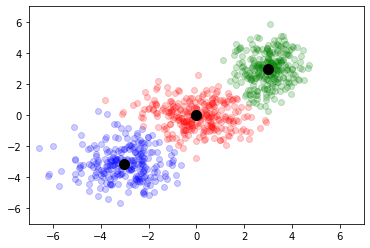

In [273]:
plt.scatter(label0.T[0], label0.T[1], color = "red", alpha=0.2)
plt.scatter(label1.T[0], label1.T[1], color = "blue", alpha=0.2)
plt.scatter(label2.T[0], label2.T[1], color = "green", alpha=0.2)
plt.scatter(kmeans.cluster_centers_.T[0], kmeans.cluster_centers_.T[1], color = "black", sizes = [100])

fx_contour = generateDistribution2D(np.sort(sxb.T[0]), np.sort(sxb.T[1]), p_em, mu_em, sig_em)

# X, Y = np.meshgrid(np.sort(sxb.T[0]), np.sort(sxb.T[1]))

# plt.contour(np.sort(sxb.T[0]), np.sort(sxb.T[1]), fx_contour)

# plt.contour(X, Y, fx_contour)

plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.show()
